# Case Study business objectives

#### - Retain Customers
#### - Analyze relevant customer data
#### - Develop focused customer retention programs

In [201]:
# importing the used libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [202]:
# for familiarizing with the dataset
df = pd.read_csv('labworks.csv')
df.head()


,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [203]:
# setting column names to lower case, and setting index to Customer ID
df.columns = [i.lower() for i in df.columns] 
df.set_index('customer', inplace=True)
df.head()

,state,customer lifetime value,response,coverage,education,effective to date,employmentstatus,gender,income,location code,...,number of open complaints,number of policies,policy type,policy,renew offer type,sales channel,total claim amount,vehicle class,vehicle size,vehicle type
customer,,,,,,,,,,,,,,,,,,,,,
DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,Suburban,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,Suburban,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,Suburban,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,Suburban,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,Suburban,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


In [204]:
#checking NaN (numerical) and unique values in and standardizing them for each column
df['state'].value_counts(dropna=False) # not much to improve here
df['customer lifetime value'].isna().sum() # no zero values here
df['coverage'].value_counts(dropna=False)
df['education'].value_counts(dropna=False)
df['income'].value_counts(dropna=False) 
df['number of policies'].value_counts(dropna=False)


# these columns have no use in our theories
df.drop(columns=['effective to date', 'response','employmentstatus', 
                    'number of open complaints', 'policy type', 'policy', 
                    'renew offer type', 'vehicle class', 'vehicle size',
                    'vehicle type', 'marital status', 'monthly premium auto',
                    'months since last claim', 'months since policy inception'
                ], inplace= True)

df.head()

,state,customer lifetime value,coverage,education,gender,income,location code,number of policies,sales channel,total claim amount
customer,,,,,,,,,,
DK49336,Arizona,4809.216960,Basic,College,M,48029,Suburban,9,Agent,292.800000
KX64629,California,2228.525238,Basic,College,F,0,Suburban,1,Call Center,744.924331
LZ68649,Washington,14947.917300,Basic,Bachelor,M,22139,Suburban,2,Call Center,480.000000
XL78013,Oregon,22332.439460,Extended,College,M,49078,Suburban,2,Branch,484.013411
QA50777,Oregon,9025.067525,Premium,Bachelor,F,23675,Suburban,7,Branch,707.925645


## Setting up theories and main questions:
### 1. What is the most effective recruiting channel?
### 2. Is there a correlation between:
        - residental state and customer lifetime value
        - income and customer lifetime value
        - resindental area and total claim
        - highest education and total claim
        - gender and total claim
        - number of policies and total claim
### 3. What is the the favourite coverage package and how does it influence the customer lifetime value?

## 1. What is the most effective recruiting channel?

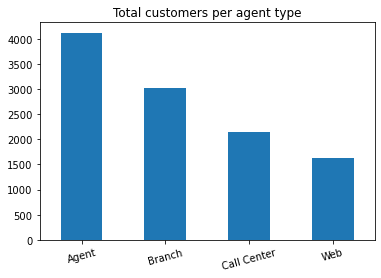

In [205]:
# Plotting Agency recruitments per channel...would be nice to see it per state
channels = df['sales channel'].value_counts() 
channels.plot.bar(rot=15, title= 'Total customers per agent type')
plt.show()


### The most effective recruitment channel are the agents.

## 2. Checking correlations:
####        How residental state influences customer lifetime value?  

ValueError: shape mismatch: objects cannot be broadcast to a single shape

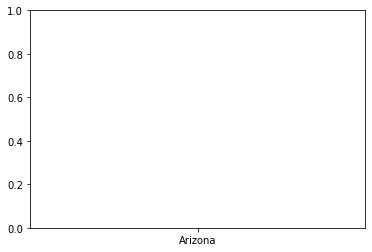

In [206]:
# to make sure there are no 0 values corrupting our insight
df['customer lifetime value'].isna().sum() #could not figure out the way to iterate this
states = list(df['state'].unique())
states[4] = 'misc.'
# could not figure out the way to iterate this
clv = []
clv.append(round(np.mean(df[df['state'] == 'Arizona']['customer lifetime value'])))
clv.append(round(np.mean(df[df['state'] == 'California']['customer lifetime value'])))
clv.append(round(np.mean(df[df['state'] == 'Washington']['customer lifetime value'])))
clv.append(round(np.mean(df[df['state'] == 'Oregon']['customer lifetime value'])))
clv.append(round(np.mean(df[df['state'] == 'Nevada']['customer lifetime value'])))

plt.bar(states, clv)
plt.yticks(7000, 7500, 8000, 8500)
plt.show



### The relation of income and customer lifetime value. 

In [207]:
# Is there a better way selecting particular rows, than setting the the index? 
df = df.set_index('state').sort_index() # Is there a better way doing this
np.mean(df.loc['Arizona', ['income', 'customer lifetime value']])

income                     37386.638616
customer lifetime value     7919.349189
dtype: float64